In [2]:
from Baby_TensorFlow import *

In [11]:
layer_sequence = [1,'ReLU', 2, 'sigmoid', 3]
loss_function = 'MSLE'

nn = NN(layer_sequence, loss_function)

# Avaliable Class Properties
print('activation func library:\n', nn.activation_funcs_library, '\n')
print('loss func library:\n', nn.loss_funcs_library, '\n')
print('current weights:\n', nn.weights, '\n')
print('current activation functions:\n', nn.activation_funcs, '\n')
print('current loss function:\n', nn.loss_func_label, ':', nn.loss_func, '\n')
print('traing error:\n', nn.training_err, '\n')

activation func library:
 {'sigmoid': '1/(1+exp(-x))', 'tanh': 'tanh(x)', 'ReLU': 'Piecewise((0,x<0),(x, x>=0))', 'Linear': 'x'} 

loss func library:
 {'MSE': '(y - y_hat)**2', 'MAE': 'Abs(y - y_hat)', 'MAPE': '100 * Abs((y - y_hat) / (y + y_hat))', 'MSLE': '(log(y + 1.) - log(y_hat + 1.))**2', 'BCE': '-(y_hat*log(y) + (1 - y_hat)*log(1 - y))', 'Poisson': 'y - y_hat * log(y)'} 

current weights:
 [array([[ 1.37259971, -1.48871455],
       [ 2.14861847, -0.65555594]]), array([[-0.04457443, -1.08479026,  0.79301507],
       [-1.13038904,  1.55396519, -0.19971441],
       [ 1.0338871 ,  0.52936912, -0.47900653]])] 

current activation functions:
 [Piecewise((0, x < 0), (x, True)), 1/(1 + exp(-x))] 

current loss function:
 MSLE : (log(y + 1.0) - log(y_hat + 1.0))**2 

traing error:
 None 



In [4]:
from tensorflow.keras.utils import img_to_array, load_img

In [100]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

y_train = (x_train.astype('float32') / 255.).reshape(len(x_train),len(x_train[0])*len(x_train[0][0])*len(x_train[0][0][0]))
y_test = (x_test.astype('float32') / 255.).reshape(len(x_test),len(x_test[0])*len(x_test[0][0])*len(x_test[0][0][0]))


x_train = color.rgb2gray(x_train).reshape(len(x_train), 32*32)
x_test = color.rgb2gray(x_test).reshape(len(x_test), 32*32)

y_train.shape

(50000, 3072)

In [102]:
num = 100
x_train, y_train = x_train[:num], y_train[:num]
x_test, y_test = x_test[:num], y_test[:num]

Epoch 1: 100%|███████████████████████████████████████████████████████████████████████| 100/100 [01:07<00:00,  1.48it/s]


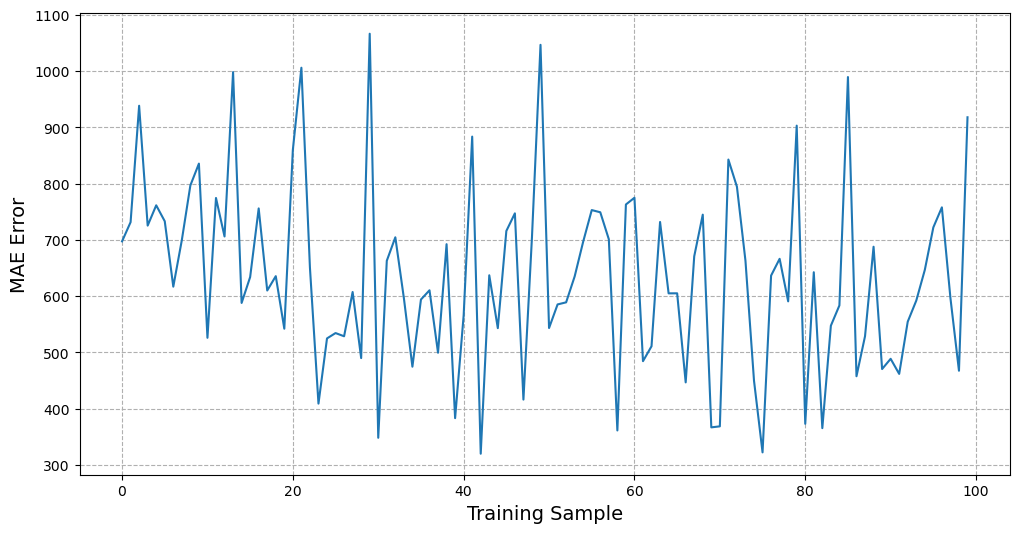

In [112]:
############################## Build network ##############################

# layer_sequence = [input_shape, 'ReLU', 392, 'ReLU', 196, 'ReLU', 98, 'ReLU', 49, 'sigmoid', output_shape]
# layer_sequence = [input_shape, 'ReLU', 100, 'sigmoid', output_shape] # initialize the layer sequences and corresponding activations
layer_sequence = [1024,'sigmoid', 100, 'sigmoid', 1000, 'sigmoid', 3072]

loss_function = 'MAE'

nn = NN(layer_sequence, loss_function) # Build a model 

################################# Run it ##################################

nn.train(x_train, y_train, batch_size = 5, epsilon = 0.01, visualize = True)

################################# Testing ##################################

# nn.evaluate(x_test, y_test)

# nn.save_model()

Evaluating Test Data: 100%|█████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 357.55it/s]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


136.41848931497563


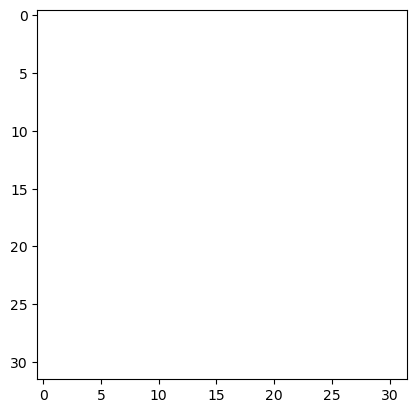

In [118]:
result = np.array(nn.evaluate(x_test))
result*=255
print(np.max(result))
plt.imshow(result[0].reshape(32,32,3))

In [47]:
test = Xtrain[5:10]
print(test.shape)
test1 = test.reshape(5,80*60*3)
print(test1.shape)
test2 = test1.reshape(5,80,60,3)
print(test2.shape)

(5, 80, 60, 3)
(5, 14400)
(5, 80, 60, 3)


(5, 80, 60)


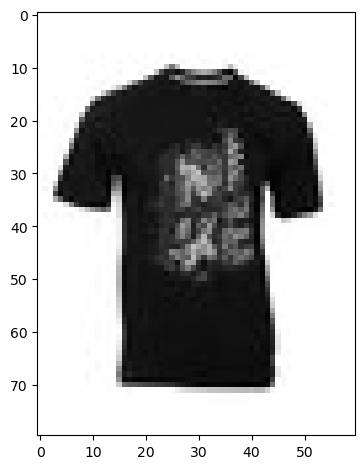

In [48]:
imgGray = color.rgb2gray(test)
print(imgGray.shape)
io.imshow(imgGray[3])

train_img = imgGray.reshape(5, 80*60)

In [53]:
nn.evaluate(train_img)

Evaluating Test Data: 100%|█████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 227.67it/s]


[array([nan, nan, nan, ..., nan, nan, nan]),
 array([nan, nan, nan, ..., nan, nan, nan]),
 array([nan, nan, nan, ..., nan, nan, nan]),
 array([nan, nan, nan, ..., nan, nan, nan]),
 array([nan, nan, nan, ..., nan, nan, nan])]

In [52]:
test1

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])